In [1]:
import os
from wce_cluster import WCECluster

base_path = "../evaluation_data/AnnotatedVideos_30FPS/"

folders = [f.path for f in os.scandir(base_path) if f.is_dir()]
for folder in folders:
    print("-----------------------")
    print(f"Section: {folder.split(os.sep)[-1]}")
    cluster = WCECluster(folder, minCl=[15,5,30], batch_size=32,smooth=True,fps=30,downsample_to_fps=10,save_full_fps=True)
    cluster.apply()

xFormers not available
xFormers not available


-----------------------
Section: 6cb700585c4f4070
Loading features from ./dumps/Features/6cb700585c4f4070/ENDO_FM_30FPS_features.npy
Adjusted sigma for downsampling factor 3: 1.7320508075688772
Downsampling from 30 FPS to 10 FPS
Control labels for downsampled data saved to ./dumps/Labels/6cb700585c4f4070/10FPS/control_labels_6cb700585c4f4070_downsampled.npy
Visualizing original distribution with sigma=1.7320508075688772
TSNE plot saved to ./dumps/Plots/6cb700585c4f4070/10FPS/ENDO_FM/FullFPSClusters/tsne_original_labels_raw_6cb700585c4f4070_sigma1.7320508075688772.svg
Interactive 3D plot saved to ./dumps/Plots/6cb700585c4f4070/10FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_original_labels_raw_6cb700585c4f4070_sigma1.7320508075688772.html
TSNE plot saved to ./dumps/Plots/6cb700585c4f4070/10FPS/ENDO_FM/FullFPSClusters/tsne_original_labels_smoothed_6cb700585c4f4070_sigma1.7320508075688772.svg
Interactive 3D plot saved to ./dumps/Plots/6cb700585c4f4070/10FPS/ENDO_FM/FullFPSClusters/inter

In [1]:
import os
from model_name import Model
from wce_cluster import WCECluster

path = "../evaluation_data/AnnotatedVideos_30FPS/8a00709108cd4e2b/"
cluster = WCECluster(path, minCl=[50], batch_size=32,smooth=True,fps=30,save_full_fps=True,backbone=Model.RES_NET_101)
cluster.apply()

xFormers not available
xFormers not available


Loading features from ./dumps/Features/8a00709108cd4e2b/RES_NET_101_30FPS_features.npy
Visualizing original distribution with sigma=2


KeyboardInterrupt: 

In [1]:
from wce_cluster import WCECluster
from model_name import Model    
import pandas as pd
import os


base_path = "../evaluation_data/kvasir_capsule_sequences/selection/"
folders = [f.path for f in os.scandir(base_path) if f.is_dir()]
minCl = 200
minCLs = [300,500,1000]

def merge_model_evaluation_csvs(base_path, minCL):
        """
        Merge all CSV files within each model's Sigma directory across all datasets,
        aggregating per sigma and keeping models separate. The sigma directories are
        placed inside a directory called 'ExperimentsMinCl{minCL}'.

        :param base_path: Path to the Evaluation directory containing dataset directories.
        :param minCL: The value of minCL used in directory naming.
        :return: Dictionary with (model, sigma) tuples as keys and concatenated DataFrames as values.
        """
        evaluation_data = {}

        # Iterate through each dataset directory
        for dataset_dir in os.listdir(base_path):
            dataset_path = os.path.join(base_path, dataset_dir)

            if os.path.isdir(dataset_path):  # Ensure it's a directory (e.g., ncm_12)
                # Inside dataset directory, look for model directories (e.g., resnet, sigma1)
                for model_dir in os.listdir(dataset_path):
                    model_path = os.path.join(dataset_path, model_dir)

                    if os.path.isdir(model_path):  # Ensure it's a directory (model directory)
                        # Look for subdirectories starting with 'Sigma'
                        sigma_dirs = [d for d in os.listdir(model_path) if d.startswith('Sigma')]

                        for sigma_dir in sigma_dirs:
                            sigma_path = os.path.join(model_path, sigma_dir)

                            if os.path.isdir(sigma_path):
                                # Initialize list for this model and sigma
                                key = (model_dir, sigma_dir)
                                if key not in evaluation_data:
                                    evaluation_data[key] = []

                                # Inside Sigma directory, look for CSV files
                                csv_files = [f for f in os.listdir(sigma_path) if f.endswith('.csv')]

                                for csv_file in csv_files:
                                    file_path = os.path.join(sigma_path, csv_file)

                                    # Read the CSV file
                                    df = pd.read_csv(file_path)

                                    # Add columns for 'Dataset', 'Model', 'Sigma'
                                    df['Dataset'] = dataset_dir
                                    df['Model'] = model_dir
                                    df['Sigma'] = sigma_dir

                                    # Store the data in the evaluation_data dictionary under the (model, sigma) key
                                    evaluation_data[key].append(df)

        # Concatenate all the CSV files for each (model, sigma)
        combined_data = {}
        for key, dfs in evaluation_data.items():
            combined_data[key] = pd.concat(dfs, ignore_index=True)

        return combined_data


for minCl in minCLs:

    for folder in folders:
        print("-----------------------")
        print(f"Section: {folder.split(os.sep)[-1]}")
        cluster = WCECluster(folder, minCl=[minCl], batch_size=32,smooth=True,fps=30,save_full_fps=True,evaluate=True,sigmas=[0,1,2,3,4,5])
        cluster.apply()
        
    for folder in folders:
        print("-----------------------")    
        print(f"Section: {folder.split(os.sep)[-1]}")
        cluster = WCECluster(folder, minCl=[minCl], batch_size=32,smooth=True,fps=30,backbone=Model.RES_NET_101,save_full_fps=True,evaluate=True, sigmas=[0,1,2,3,4,5])
        cluster.apply()


    # Example usage
    base_evaluation_path = "./dumps/Evaluation/"
    merged_results = merge_model_evaluation_csvs(base_evaluation_path, minCl)

    # Create the 'ExperimentsMinCl{minCL}' directory
    experiments_dir = f"./ExperimentsMinCl{minCl}"
    os.makedirs(experiments_dir, exist_ok=True)

    # Save the combined results into separate files for each model and sigma
    for (model, sigma), combined_df in merged_results.items():
        # Clean the sigma name to remove any file system incompatible characters if necessary
        safe_sigma = sigma.replace('/', '_').replace('\\', '_')
        # Create directory for this Sigma within 'ExperimentsMinCl{minCL}' if it doesn't exist
        sigma_dir = os.path.join(experiments_dir, safe_sigma)
        os.makedirs(sigma_dir, exist_ok=True)
        # Build the output path
        output_path = os.path.join(sigma_dir, f"combined_{model}_{safe_sigma}_results.csv")
        combined_df.to_csv(output_path, index=False)

    print(f"CSV files have been merged and saved into directories per Sigma within 'ExperimentsMinCl{minCl}'.")


xFormers not available
xFormers not available


-----------------------
Section: ncm_12
Loading features from ./dumps/Features/ncm_12/ENDO_FM_30FPS_features.npy
Original distribution plots already exist: ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/tsne_original_labels_raw_ncm_12_sigma0.svg
Clustering with minCl: 300, minSpl: 1
Plots exist for this combination: ./dumps/Plots/ncm_12/30FPS/ENDO_FM/tsne_control_labels_ncm_12.svg
Extrapolating clusters: Fitting KNN on data of shape (3386, 768)
Predicting labels for full data of shape (3386, 768)
Full predicted labels assigned with shape (3386,)
Control labels for full FPS data saved to ./dumps/Labels/ncm_12/30FPS/full_control_labels_ncm_12.npy
Evaluation with anomalies (-1 included):
Accuracy: 0.5366
NMI: 0.1247
ARI: -0.0393

Evaluation without anomalies (-1 excluded):
Accuracy: 0.5237
NMI: 0.0875
ARI: -0.0874
TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_12_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./du

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma1_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma1_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma1_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma1_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1    300       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma2_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma2_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma2_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma2_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2    300       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma3_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma3_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma3_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma3_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3    300       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_9_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_9_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_9_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_9_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.804888                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300       1  
Evaluation results saved to ./d

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma1_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma1_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma1_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma1_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1    300       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_12_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_12_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_12_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_12_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.61518                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300       1  
Evaluation resu

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma2_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma2_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma2_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma2_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2    300       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma3_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma3_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma3_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma3_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3    300       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma4_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma4_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma4_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma4_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4    300       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma5_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma5_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma5_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma5_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5    300       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_6/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_6_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_6/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_6_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_6/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_6_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_6/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_6_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.346991                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_1_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_1_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_1_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_1_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.694122                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_7_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_7_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_7_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_7_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.612495                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_9_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_9_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_9_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_9_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.804888                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_1_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_1_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_1_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_1_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.34193                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300  

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_11_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_11_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_11_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_11_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.427437                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300       1  
Evaluation resu

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300       1  
Evaluation resu

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_2/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_2_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_2/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_2_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_2/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_2_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_2/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_2_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.398639                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_5/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_5_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_5/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_5_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_5/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_5_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_5/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_5_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.370107                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_4_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_4_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_4_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_4_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.523744                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_2/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_2_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_2/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_2_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_2/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_2_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_2/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_2_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.344003                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300  

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_4_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_4_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_4_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_4_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.408993                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300  

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_3_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_3_sigma0_minCl300_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_3_sigma0_minCl300_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_3_sigma0_minCl300_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.387108                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    300  

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma1_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma1_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma1_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma1_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1    500       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma2_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma2_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma2_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma2_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2    500       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma3_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma3_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma3_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma3_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3    500       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma4_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma4_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma4_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma4_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4    500       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma5_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma5_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma5_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma5_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5    500       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_6/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_6_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_6/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_6_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_6/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_6_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_6/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_6_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.346991                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_1_sigma1_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_1_sigma1_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_1_sigma1_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_1_sigma1_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.694122                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1    500       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_1_sigma3_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_1_sigma3_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_1_sigma3_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_1_sigma3_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.694122                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3    500       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_7_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_7_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_7_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_7_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.612495                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_7_sigma1_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_7_sigma1_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_7_sigma1_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_7_sigma1_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.612495                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1    500       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_9_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_9_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_9_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_9_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.804888                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_1_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_1_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_1_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_1_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.34193                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluat

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_11_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_11_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_11_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_11_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.427437                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation results saved to ./d

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation results saved to ./d

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma1_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma1_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma1_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma1_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1    500       1  
Evaluation results saved to ./d

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_5/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_5_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_5/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_5_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_5/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_5_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_5/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_5_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.370107                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma1_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma1_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma1_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma1_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1    500       1  
Evaluation results saved to ./dumps/Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_3_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_3_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_3_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_3_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.387108                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluat

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_12_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_12_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_12_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_12_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.61518                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation resu

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma1_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma1_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma1_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma1_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1    500       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma2_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma2_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma2_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma2_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2    500       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma3_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma3_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma3_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma3_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3    500       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma4_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma4_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma4_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma4_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4    500       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma5_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma5_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma5_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma5_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5    500       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_6/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_6_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_6/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_6_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_6/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_6_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_6/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_6_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.346991                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_1_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_1_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_1_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_1_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.694122                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_7_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_7_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_7_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_7_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.612495                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_9_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_9_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_9_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_9_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.804888                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_1_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_1_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_1_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_1_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.34193                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500  

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_11_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_11_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_11_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_11_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.427437                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation resu

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation resu

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma1_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma1_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma1_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma1_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1    500       1  
Evaluation resu

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma4_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma4_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma4_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma4_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4    500       1  
Evaluation resu

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_2/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_2_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_2/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_2_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_2/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_2_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_2/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_2_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.398639                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_5/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_5_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_5/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_5_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_5/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_5_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_5/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_5_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.370107                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_4_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_4_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_4_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_4_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.523744                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma4_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma4_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma4_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma4_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4    500       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma5_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma5_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma5_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma5_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5    500       1  
Evaluation results save

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_2/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_2_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_2/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_2_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_2/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_2_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_2/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_2_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.344003                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500  

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_4_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_4_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_4_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_4_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.408993                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500  

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_3_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_3_sigma0_minCl500_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_3_sigma0_minCl500_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_3_sigma0_minCl500_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.387108                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0    500  

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_12_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_12_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_12_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_12_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.61518                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results saved to

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_12_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_12_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_12_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_12_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.61518                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation results saved to

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_12_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_12_sigma2_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_12_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_12_sigma2_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.61518                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2   1000       1  
Evaluation results saved to

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_12_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_12_sigma3_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_12_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_12_sigma3_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.61518                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3   1000       1  
Evaluation results saved to

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_12_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_12_sigma4_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_12_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_12_sigma4_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.61518                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4   1000       1  
Evaluation results saved to

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_12_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_12_sigma5_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_12_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_12_sigma5_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.61518                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5   1000       1  
Evaluation results saved to

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma2_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma2_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma3_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma3_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma4_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma4_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma5_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma5_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_6/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_6_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_6/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_6_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_6/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_6_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_6/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_6_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.346991                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_6/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_6_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_6/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_6_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_6/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_6_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_6/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_6_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.346991                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_1_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_1_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_1_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_1_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.694122                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_1_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_1_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_1_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_1_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.694122                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_1_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_1_sigma2_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_1_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_1_sigma2_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.694122                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_1_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_1_sigma3_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_1_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_1_sigma3_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.694122                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_1_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_1_sigma4_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_1_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_1_sigma4_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.694122                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_1_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_1_sigma5_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_1_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_1_sigma5_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.694122                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_7_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_7_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_7_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_7_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.612495                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_7_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_7_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_7_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_7_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.612495                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_7_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_7_sigma3_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_7_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_7_sigma3_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.612495                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_7_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_7_sigma4_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_7_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_7_sigma4_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.612495                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_7_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_7_sigma5_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_7_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_7_sigma5_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.612495                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_9_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_9_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_9_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_9_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.804888                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_9_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_9_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_9_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_9_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.804888                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_9_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_9_sigma2_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_9_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_9_sigma2_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.804888                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_9_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_9_sigma3_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_9_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_9_sigma3_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.804888                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_9_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_9_sigma4_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_9_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_9_sigma4_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.804888                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_9_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_9_sigma5_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_9_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_9_sigma5_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.804888                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_1_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_1_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_1_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_1_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.34193                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_1_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_1_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_1_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_1_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.34193                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_1_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_1_sigma2_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_1_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_1_sigma2_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.34193                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2   1000       1  
Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_1_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_1_sigma3_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_1_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_1_sigma3_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.34193                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3   1000       1  
Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_1_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_1_sigma4_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_1_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_1_sigma4_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.34193                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4   1000       1  
Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_1_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_1_sigma5_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_1_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_1_sigma5_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.34193                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5   1000       1  
Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



Evaluation with anomalies (-1 included):
Accuracy: 0.4274
NMI: 0.0000
ARI: 0.0000

Evaluation without anomalies (-1 excluded):
Accuracy: nan
NMI: 1.0000
ARI: 1.0000
TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_11_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_11_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_11_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_11_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.427437                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomali

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_11_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_11_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_11_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_11_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.427437                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation results saved to

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_11_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_11_sigma2_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_11_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_11_sigma2_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.427437                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2   1000       1  
Evaluation results saved to

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_11_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_11_sigma3_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_11_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_11_sigma3_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.427437                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3   1000       1  
Evaluation results saved to

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_11_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_11_sigma4_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_11_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_11_sigma4_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.427437                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4   1000       1  
Evaluation results saved to

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_11_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_11_sigma5_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_11_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_11_sigma5_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.427437                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5   1000       1  
Evaluation results saved to

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results saved to

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation results saved to

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma2_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma2_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2   1000       1  
Evaluation results saved to

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma3_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma3_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3   1000       1  
Evaluation results saved to

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma4_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma4_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4   1000       1  
Evaluation results saved to

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma5_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma5_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5   1000       1  
Evaluation results saved to

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_2/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_2_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_2/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_2_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_2/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_2_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_2/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_2_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.398639                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_2/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_2_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_2/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_2_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_2/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_2_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_2/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_2_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.398639                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_2/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_2_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_2/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_2_sigma2_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_2/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_2_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_2/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_2_sigma2_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.398639                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_5/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_5_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_5/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_5_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_5/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_5_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_5/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_5_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.370107                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_5/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_5_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_5/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_5_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_5/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_5_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_5/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_5_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.370107                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_4_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_4_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_4_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_4_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.523744                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_4_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_4_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_4_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_4_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.523744                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_4_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_4_sigma2_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_4_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_4_sigma2_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.523744                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_4_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_4_sigma4_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_4_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_4_sigma4_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.523744                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_4_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_4_sigma5_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_4_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_4_sigma5_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.523744                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma2_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma2_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma3_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma3_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma4_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma4_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma5_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma5_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5   1000       1  
Evaluation results saved to ./dumps

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_2/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_2_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_2/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_2_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_2/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_2_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_2/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_2_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.344003                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_4/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_4_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_4/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_4_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_4/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_4_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_4/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_4_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.408993                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_3_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_3_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/ENDO_FM/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_3_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/ENDO_FM/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_3_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.387108                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Eva

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_12_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_12_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_12_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_12_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.61518                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_12_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_12_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_12/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_12_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_12/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_12_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.61518                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma2_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma2_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma3_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma3_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma4_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma4_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_8_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_8_sigma5_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_8_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_8/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_8_sigma5_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.580804                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_6/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_6_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_6/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_6_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_6/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_6_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_6/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_6_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.346991                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_6/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_6_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_6/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_6_sigma5_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_6/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_6_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_6/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_6_sigma5_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.346991                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_1_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_1_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_1_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_1_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.694122                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_1_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_1_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_1_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_1_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.694122                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_7_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_7_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_7_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_7_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.612495                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_7_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_7_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_7/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_7_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_7/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_7_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.612495                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_9_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_9_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_9_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_9_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.804888                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_9_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_9_sigma4_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_9_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_9_sigma4_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.804888                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_9_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_9_sigma5_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_9_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_9/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_9_sigma5_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.804888                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_1_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_1_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_1_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_1_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.34193                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   10

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_1_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_1_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_1_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_1_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.34193                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   10

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_1_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_1_sigma2_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_1_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_1_sigma2_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.34193                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2   10

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_1_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_1_sigma3_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_1_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_1_sigma3_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.34193                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3   10

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_1_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_1_sigma4_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_1_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_1_sigma4_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.34193                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4   10

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_1_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_1_sigma5_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_1_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_1/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_1_sigma5_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.34193                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5   10

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_11_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_11_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_11_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_11_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.427437                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_11_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_11_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_11_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_11_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.427437                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_11_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_11_sigma2_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_11_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_11/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_11_sigma2_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.427437                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2   1000       1  
Evaluation 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma2_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma2_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2   1000       1  
Evaluation 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma3_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma3_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3   1000       1  
Evaluation 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma4_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma4_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4   1000       1  
Evaluation 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_10_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_10_sigma5_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_10_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_10/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_10_sigma5_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                  0.37402                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5   1000       1  
Evaluation 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_2/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_2_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_2/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_2_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_2/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_2_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_2/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_2_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.398639                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_5/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_5_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_5/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_5_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_5/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_5_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_5/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_5_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.370107                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_4_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_4_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_4_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_4_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.523744                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_4_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_4_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_4_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_4_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.523744                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_4_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_4_sigma2_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_4_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_4_sigma2_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.523744                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_4_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_4_sigma3_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_4_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_4_sigma3_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.523744                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_4_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_4_sigma4_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_4_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_4_sigma4_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.523744                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_4_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_4_sigma5_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_4_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_4_sigma5_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.523744                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma2_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma2_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma2_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      2   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma3_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma3_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma3_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      3   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma4_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma4_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma4_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      4   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_3_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_3_sigma5_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_3_sigma5_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_3_sigma5_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.474192                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      5   1000       1  
Evaluation results 

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_2/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_2_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_2/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_2_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_2/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_2_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_2/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_2_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.344003                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   10

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_4_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_4_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_4/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_4_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_4/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_4_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.408993                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   10

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_3_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_3_sigma0_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_3_sigma0_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_3_sigma0_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.387108                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      0   10

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning:

Mean of empty slice.

/Users/bapierro/Library/Caches/pypoetry/virtualenvs/b-thesis-FC_XzYgg-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



TSNE plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_transformed_ncm_rmv_3_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_transformed_ncm_rmv_3_sigma1_minCl1000_minSpl1.html
TSNE plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/RES_NET_101/FullFPSClusters/tsne_full_fps_clusters_raw_ncm_rmv_3_sigma1_minCl1000_minSpl1.svg
Interactive 3D plot saved to ./dumps/Plots/ncm_rmv_3/30FPS/RES_NET_101/FullFPSClusters/interactive_3d_plot_full_fps_clusters_raw_ncm_rmv_3_sigma1_minCl1000_minSpl1.html

Evaluation Results:
   accuracy_with_anomalies  nmi_with_anomalies  ari_with_anomalies  \
0                 0.387108                 0.0                 0.0   

   accuracy_without_anomalies  nmi_without_anomalies  ari_without_anomalies  \
0                         NaN                    1.0                    1.0   

   sigma  minCl  minSpl  
0      1   10

t-SNE Plot without Gaussian filter:


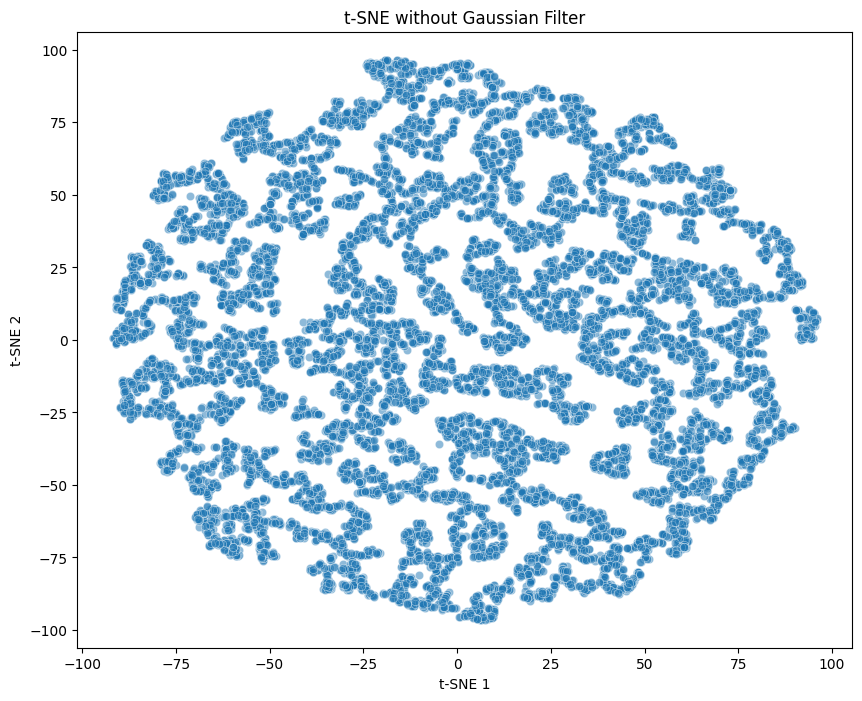

t-SNE Plot with Gaussian filter:


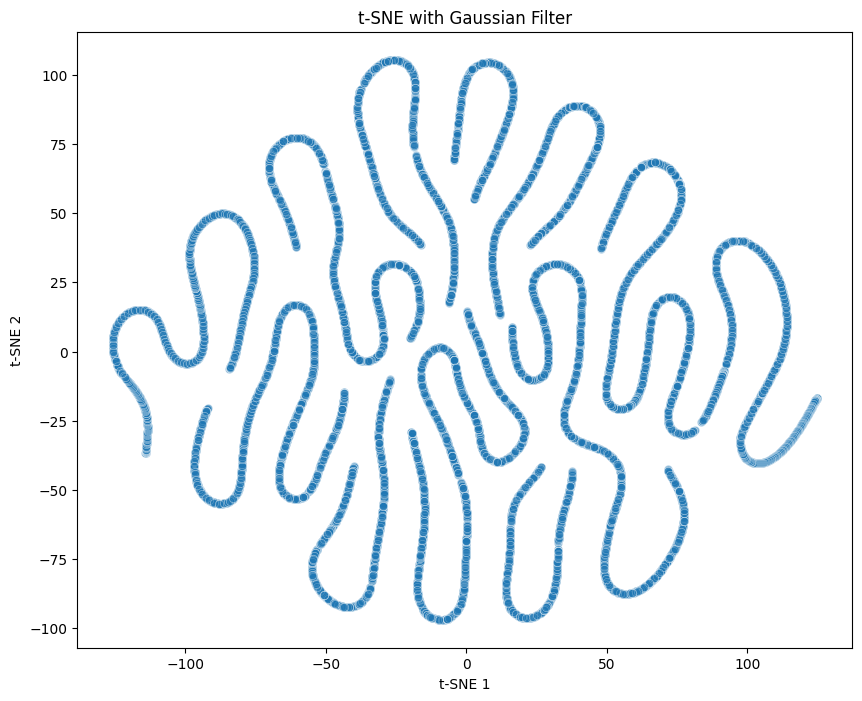

In [1]:
# Required imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from scipy.ndimage import gaussian_filter
import plotly.graph_objects as go

# Step 1: Generate random dense point cloud
np.random.seed(42)  # For reproducibility
num_points = 15000
point_cloud = np.random.rand(num_points, 3)  # Random points in 3D

# Step 2: Visualize t-SNE before applying Gaussian filter
def plot_tsne(points, title, plot_3d=False):
    # TSNE with 2 components for 2D plot
    tsne = TSNE(n_components=2, random_state=42)
    tsne_data = tsne.fit_transform(points)
    
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], legend=None, alpha=0.5)
    plt.title(title)
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.show()
    
    if plot_3d:
        # Create a 3D plotly plot of the original point cloud
        fig = go.Figure(data=[go.Scatter3d(
            x=np.arange(len(tsne_data[:, 0])), y=tsne_data[:, 0], z=tsne_data[:, 1],
            mode='markers', marker=dict(size=3, opacity=0.6)
        )])
        fig.update_layout(title=f"3D Point Cloud - {title}", width=800, height=600)
        fig.show()

# Step 3: Plot t-SNE without Gaussian filtering
print("t-SNE Plot without Gaussian filter:")
plot_tsne(point_cloud, "t-SNE without Gaussian Filter", plot_3d=True)

# Step 4: Apply Gaussian filter to the point cloud
sigma = 100  # Smoothing factor
smoothed_point_cloud = gaussian_filter(point_cloud, sigma=sigma, radius=3*sigma)

# Step 5: Plot t-SNE after applying Gaussian filtering
print("t-SNE Plot with Gaussian filter:")
plot_tsne(smoothed_point_cloud, "t-SNE with Gaussian Filter", plot_3d=True)